In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_excel("/content/drive/MyDrive/Copy of a2_Dataset_90Percent (1).xlsx")

In [3]:
dataset

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,868,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,1120,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,2313,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0
...,...,...,...,...,...,...,...,...,...,...
994,3584909,6.0,51.0,E,NaN,Midlands,East,Tin,0.01,8.0
995,3585093,9.0,57.0,E,M,South East,London,Silver,3000.00,1.0
996,3585174,4.0,77.0,E,F,South East,London,Gold,6035.46,9.0
997,3585301,NaN,53.0,D,F,Midlands,Midlands,Tin,0.01,5.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               999 non-null    int64  
 1   DemAffl          951 non-null    float64
 2   DemAge           932 non-null    float64
 3   DemClusterGroup  971 non-null    object 
 4   DemGender        885 non-null    object 
 5   DemReg           981 non-null    object 
 6   DemTVReg         981 non-null    object 
 7   LoyalClass       999 non-null    object 
 8   LoyalSpend       999 non-null    float64
 9   LoyalTime        984 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset.isnull().sum()

ID                   0
DemAffl             48
DemAge              67
DemClusterGroup     28
DemGender          114
DemReg              18
DemTVReg            18
LoyalClass           0
LoyalSpend           0
LoyalTime           15
dtype: int64

checking the null values and , we decided to clean the data . to clean the data . we firstly drop the ID column and fill the null values from the mean mediean and mode according to the type of the column , as we have a limited dataset.

In [7]:
dataset.drop("ID",axis=1,inplace=True)

In [8]:
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0


In [9]:
dataset["DemAffl"]=dataset["DemAffl"].fillna(dataset["DemAffl"].mode()[0])
dataset["DemAge"]=dataset["DemAge"].fillna(dataset["DemAge"].mode()[0])
dataset["DemClusterGroup"]=dataset["DemClusterGroup"].fillna(dataset["DemClusterGroup"].mode()[0])
dataset["DemGender"]=dataset["DemGender"].fillna(dataset["DemGender"].mode()[0])
dataset["DemReg"]=dataset["DemReg"].fillna(dataset["DemReg"].mode()[0])
dataset["DemTVReg"]=dataset["DemTVReg"].fillna(dataset["DemTVReg"].mode()[0])
dataset["LoyalClass"]=dataset["LoyalClass"].fillna(dataset["LoyalClass"].mode()[0])
dataset["LoyalTime"]=dataset["LoyalTime"].fillna(dataset["LoyalTime"].mean())


**Data Preprocessing for Missing Values**
In this notebook, we perform essential data preprocessing steps to handle missing values in our dataset. Missing values can significantly impact the performance of machine learning models, and addressing them is crucial for accurate analysis. We focus on imputing missing values for specific columns using appropriate strategies.
# **1. Handling Missing Values in Categorical Columns**


**1.1 DemAffl (Affluence Level**)
We fill missing values in the 'DemAffl' column with the mode, representing the most frequent affluence level in the dataset.

**1.2 DemAge (Age)**
Missing values in the 'DemAge' column are imputed with the mode, reflecting the most common age category.

**1.3 DemClusterGroup (Cluster Group)**
For the 'DemClusterGroup' column, missing values are replaced with the mode, indicating the most prevalent cluster group.

**1.4 DemGender (Gender)**
We impute missing values in the 'DemGender' column with the mode, signifying the most frequent gender in the dataset.

**1.5 DemReg (Region)**
Missing values in the 'DemReg' column are filled with the mode, representing the most common region.

**1.6 DemTVReg (TV Region)**
The 'DemTVReg' column missing values are replaced with the mode, indicating the most prevalent TV region.

**1.7 LoyalClass (Loyalty Class)**
For the 'LoyalClass' column, we use the mode to fill in missing values, representing the most frequent loyalty class.
# 2. Handling Missing Values in Numerical Columns
2. Handling Missing Values in Numerical Columns
2.1 LoyalTime (Loyalty Time)
The 'LoyalTime' column missing values are imputed with the mean, providing a central tendency measure for loyalty time.

By employing these strategies, we ensure that our dataset is ready for subsequent analysis or modeling, minimizing the impact of missing data on the integrity of our results.

In [10]:
dataset

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0
...,...,...,...,...,...,...,...,...,...
994,6.0,51.0,E,F,Midlands,East,Tin,0.01,8.0
995,9.0,57.0,E,M,South East,London,Silver,3000.00,1.0
996,4.0,77.0,E,F,South East,London,Gold,6035.46,9.0
997,8.0,53.0,D,F,Midlands,Midlands,Tin,0.01,5.0


In [11]:
dataset.isnull().sum().sum()

0

In [12]:
dataset["DemClusterGroup"].value_counts()

C    231
D    195
F    185
B    153
E    141
A     93
U      1
Name: DemClusterGroup, dtype: int64

In [13]:
# from sklearn.preprocessing import LabelEncoder


# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Encode the categorical column
# dataset['Encoded_DemClusterGroup'] = label_encoder.fit_transform(dataset['DemClusterGroup'])

# # Print the original categories and their encoded values
# print("Original Categories:")
# print(dataset['DemClusterGroup'].unique())

# print("\nEncoded Categories:")
# print(dict(zip(dataset['DemClusterGroup'].unique(), label_encoder.transform(dataset['DemClusterGroup'].unique()))))

# # Display the DataFrame with the encoded column
# print("\nDataFrame with Encoded Column:")
# print(dataset)

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataframe, categorical_columns):
    """
    Encode specified categorical columns in the DataFrame using Label Encoding.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame with categorical columns.
    - categorical_columns (list): List of column names to be encoded.

    Returns:
    - pd.DataFrame: DataFrame with encoded categorical columns.
    - dict: Dictionary containing mappings of original categories to encoded values for each column.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    encoded_df = dataframe.copy()

    # Dictionary to store mappings for each column
    column_mappings = {}

    # Iterate through specified columns and encode if they are of object (string) type
    for column in categorical_columns:
        if encoded_df[column].dtype == 'O':  # 'O' represents object (string) type
            label_encoder = LabelEncoder()
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
            column_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

    return encoded_df, column_mappings




In [15]:
object_columns = dataset.select_dtypes(include=['object'])
object_columns.columns

Index(['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'LoyalClass'], dtype='object')

In [16]:


# Specify the categorical columns to be encoded
categorical_columns_to_encode = ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'LoyalClass']

# Use the function to encode the specified columns
dataset_encoded, mappings = encode_categorical_columns(dataset, categorical_columns_to_encode)

# Display the DataFrame with encoded columns and mappings
print("Encoded DataFrame:")
dataset_encoded

print("\nCategory Mappings:")
print(mappings)

Encoded DataFrame:

Category Mappings:
{'DemClusterGroup': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'U': 7}, 'DemGender': {'F': 1, 'M': 2, 'U': 3}, 'DemReg': {'Midlands': 1, 'North': 2, 'Scottish': 3, 'South East': 4, 'South West': 5}, 'DemTVReg': {'Border': 1, 'C Scotland': 2, 'East': 3, 'London': 4, 'Midlands': 5, 'N East': 6, 'N Scot': 7, 'N West': 8, 'S & S East': 9, 'S West': 10, 'Ulster': 11, 'Wales & West': 12, 'Yorkshire': 13}, 'LoyalClass': {'Gold': 1, 'Platinum': 2, 'Silver': 3, 'Tin': 4}}


# Category Mappings:
The categorical columns have been encoded with the following mappings:

# DemClusterGroup:

'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'U': 7
# DemGender:

'F': 1, 'M': 2, 'U': 3
# DemReg:

'Midlands': 1, 'North': 2, 'Scottish': 3, 'South East': 4, 'South West': 5
# DemTVReg:

'Border': 1, 'C Scotland': 2, 'East': 3, 'London': 4, 'Midlands': 5, 'N East': 6, 'N Scot': 7, 'N West': 8, 'S & S East': 9, 'S West': 10, 'Ulster': 11, 'Wales & West': 12, 'Yorkshire': 13
# LoyalClass:

'Gold': 1, 'Platinum': 2, 'Silver': 3, 'Tin': 4
These mappings provide a clear understanding of the numerical values assigned to each category in the encoded DataFrame.

In [17]:
dataset_encoded

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,10.0,76.0,2,2,0,11,0,16000.00,4.0
1,4.0,49.0,3,2,0,11,0,6000.00,5.0
2,5.0,70.0,3,0,0,11,2,0.02,8.0
3,10.0,65.0,5,1,0,4,3,0.01,7.0
4,11.0,68.0,0,0,0,4,3,0.01,8.0
...,...,...,...,...,...,...,...,...,...
994,6.0,51.0,4,0,0,2,3,0.01,8.0
995,9.0,57.0,4,1,3,3,2,3000.00,1.0
996,4.0,77.0,4,0,3,3,0,6035.46,9.0
997,8.0,53.0,3,0,0,4,3,0.01,5.0


In [18]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          999 non-null    float64
 1   DemAge           999 non-null    float64
 2   DemClusterGroup  999 non-null    int64  
 3   DemGender        999 non-null    int64  
 4   DemReg           999 non-null    int64  
 5   DemTVReg         999 non-null    int64  
 6   LoyalClass       999 non-null    int64  
 7   LoyalSpend       999 non-null    float64
 8   LoyalTime        999 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 70.4 KB


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable in the encoded DataFrame
vif_data = pd.DataFrame()
vif_data["Variable"] = dataset_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(dataset_encoded.values, i) for i in range(dataset_encoded.shape[1])]

# Display the VIF values
print(vif_data)


          Variable        VIF
0          DemAffl   6.367212
1           DemAge  11.060415
2  DemClusterGroup   3.653010
3        DemGender   1.432959
4           DemReg   2.352435
5         DemTVReg   3.870916
6       LoyalClass   4.617462
7       LoyalSpend   2.328404
8        LoyalTime   3.290425


<Axes: >

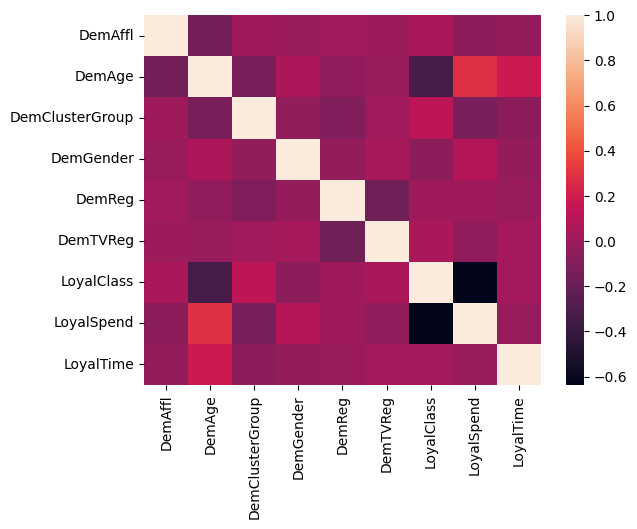

In [20]:
sns.heatmap(dataset_encoded.corr())

In [29]:
import joblib
classifier = joblib.load('/content/drive/MyDrive/logistic_model.joblib')

array([[1.00000e+01, 7.60000e+01, 2.00000e+00, ..., 0.00000e+00,
        1.60000e+04, 4.00000e+00],
       [4.00000e+00, 4.90000e+01, 3.00000e+00, ..., 0.00000e+00,
        6.00000e+03, 5.00000e+00],
       [5.00000e+00, 7.00000e+01, 3.00000e+00, ..., 2.00000e+00,
        2.00000e-02, 8.00000e+00],
       ...,
       [4.00000e+00, 7.70000e+01, 4.00000e+00, ..., 0.00000e+00,
        6.03546e+03, 9.00000e+00],
       [8.00000e+00, 5.30000e+01, 3.00000e+00, ..., 3.00000e+00,
        1.00000e-02, 5.00000e+00],
       [1.10000e+01, 4.40000e+01, 0.00000e+00, ..., 0.00000e+00,
        6.05335e+03, 7.00000e+00]])

In [27]:
dataset_encoded


,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,10.0,76.0,2,2,0,11,0,16000.00,4.0
1,4.0,49.0,3,2,0,11,0,6000.00,5.0
2,5.0,70.0,3,0,0,11,2,0.02,8.0
3,10.0,65.0,5,1,0,4,3,0.01,7.0
4,11.0,68.0,0,0,0,4,3,0.01,8.0
...,...,...,...,...,...,...,...,...,...
994,6.0,51.0,4,0,0,2,3,0.01,8.0
995,9.0,57.0,4,1,3,3,2,3000.00,1.0
996,4.0,77.0,4,0,3,3,0,6035.46,9.0
997,8.0,53.0,3,0,0,4,3,0.01,5.0


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
scaler = StandardScaler()
newdata = scaler.fit_transform(dataset_encoded)


In [37]:
y_pred = classifier.predict(newdata)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 

In [38]:
predictions = classifier.predict_proba(newdata)
predictions

array([[0.97729131, 0.02270869],
       [0.97641516, 0.02358484],
       [0.94691562, 0.05308438],
       ...,
       [0.96960373, 0.03039627],
       [0.76898775, 0.23101225],
       [0.50910456, 0.49089544]])

In [39]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
dfx=pd.concat([dataset,df_prediction_prob], axis=1)
dfx.to_excel("d2_BuyProb_90Percent.xlsx")
dfx.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,prob_0,prob_1
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0.977291,0.022709
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0.976415,0.023585
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,0.946916,0.053084
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0,0.896151,0.103849
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0.789069,0.210931
